# Import Libraries

In [1348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from sklearn.utils.validation import column_or_1d

# Import Datasets

In [1349]:
DF_train = pd.read_csv('train.csv')
DF_test = pd.read_csv('test.csv')
DF_gender = pd.read_csv('gender_submission.csv')

In [1350]:
DF_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1351]:
print(f'Number of train data before preprocessing: {DF_train.shape[0]}')
print(f'Number of train Columns before preprocessing: {DF_train.shape[1]}')

Number of train data before preprocessing: 891
Number of train Columns before preprocessing: 12


In [1352]:
DF_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1353]:
print(f'Number of test data before preprocessing: {DF_test.shape[0]}')
print(f'Number of test Columns before preprocessing: {DF_test.shape[1]}')

Number of test data before preprocessing: 418
Number of test Columns before preprocessing: 11


In [1354]:
DF_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1355]:
print(f'Number of Gender data: {DF_gender.shape[0]}')

Number of Gender data: 418


In [1356]:
# Concatenate test data with the survived dataset for test data
DF_test.insert(loc=1, column='Survived', value=DF_gender.iloc[:,1])

In [1357]:
DF_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1358]:
print(f'Number of test data before preprocessing: {DF_test.shape[0]}')
print(f'Number of test Columns before preprocessing (After Concatenation): {DF_test.shape[1]}')

Number of test data before preprocessing: 418
Number of test Columns before preprocessing (After Concatenation): 12


In [1359]:
# Concatenate the test dataset with the train dataset
DF = pd.concat([DF_train,DF_test], axis=0)

In [1360]:
print(f'Number of data before preprocessing: {DF.shape[0]}')

Number of data before preprocessing: 1309


In [1361]:
# Reset Index is needed, because of the concatenation of two datasets with different indexes
DF = DF.reset_index()
DF = DF.drop('index', axis=1)

In [1362]:
DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1363]:
# Types of features
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [1364]:
# Remove useless columns (Features)
DF.drop(columns = ['PassengerId','Ticket'], inplace = True)

In [1365]:
print('Number of int64 columns before preprocessing: %i '% (DF.select_dtypes(include=['int64']).columns.shape[0]))
print('Number of float64 columns before preprocessing: %i '% (DF.select_dtypes(include=['float64']).columns.shape[0]))
print('Number of object columns before preprocessing: %i '% (DF.select_dtypes(include=['object']).columns.shape[0]))

Number of int64 columns before preprocessing: 4 
Number of float64 columns before preprocessing: 2 
Number of object columns before preprocessing: 4 


In [1366]:
DF.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

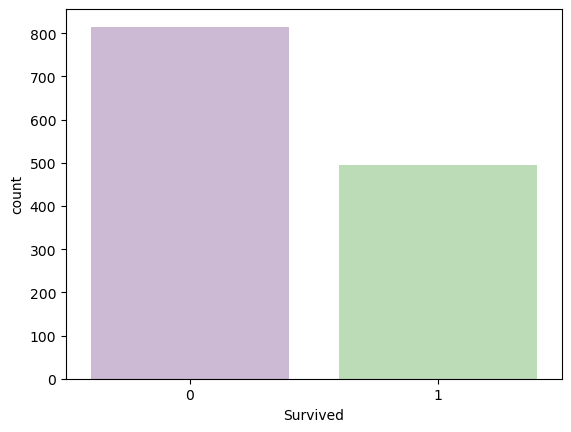

In [1367]:
sns.countplot(x='Survived', hue= 'Survived',data=DF, palette='PRGn', legend=False)

<Axes: xlabel='Pclass', ylabel='count'>

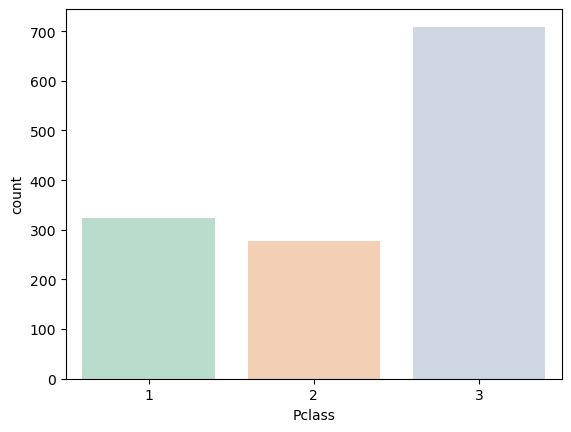

In [1368]:
sns.countplot(x='Pclass', hue= 'Pclass',data=DF, palette='Pastel2', legend=False)

<Axes: xlabel='Sex', ylabel='count'>

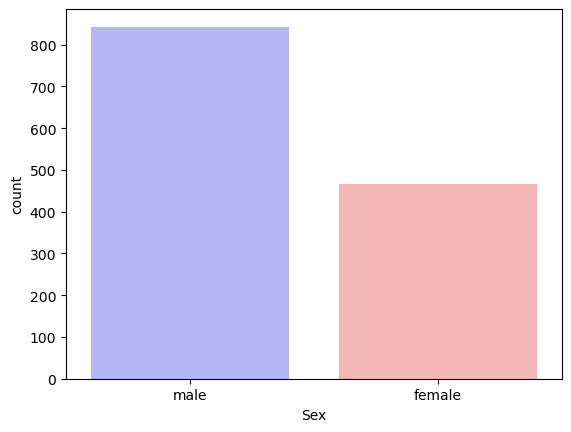

In [1369]:
sns.countplot(x='Sex', hue= 'Sex',data=DF, palette='bwr', legend=False)

<Axes: xlabel='Embarked', ylabel='count'>

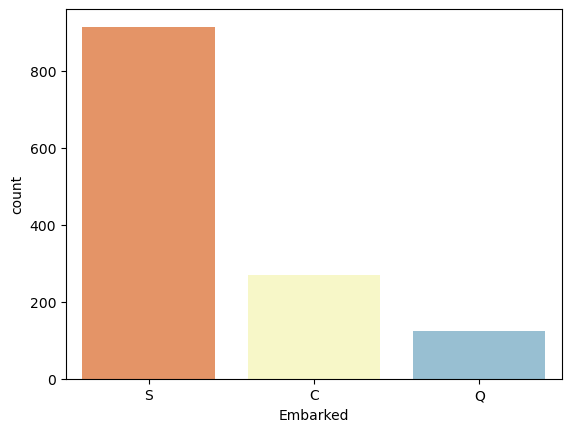

In [1370]:
sns.countplot(x='Embarked', hue= 'Embarked',data=DF, palette='RdYlBu', legend=False)

<Axes: xlabel='Age', ylabel='Count'>

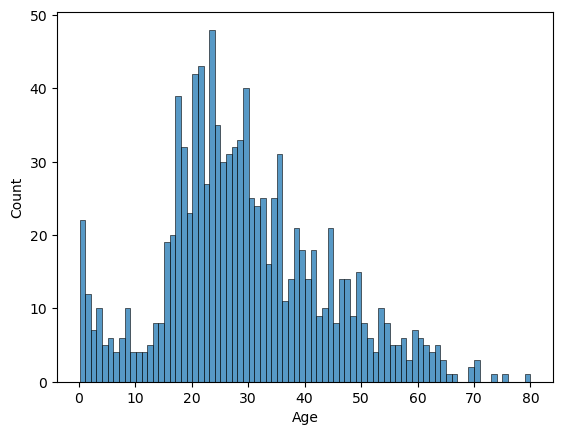

In [1371]:
sns.histplot(DF['Age'],kde=False,bins=80)

<Axes: xlabel='Fare', ylabel='Count'>

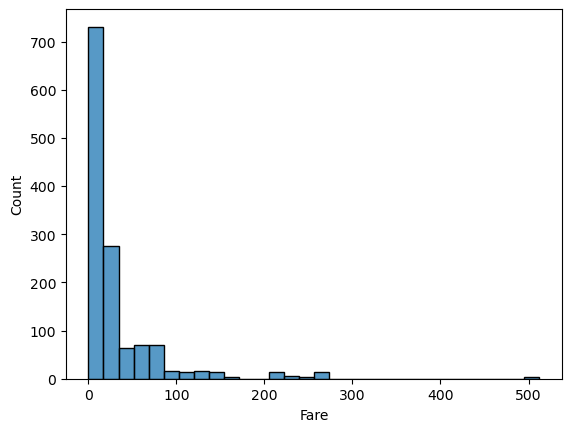

In [1372]:
sns.histplot(DF['Fare'],kde=False,bins=30)

# Feature Engineering

In [1373]:
# Create Title Feature

DF['Title'] = DF['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print(DF['Title'].value_counts())

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64


In [1374]:
# Replace many titles with a more common name or 'Other'
DF['Title'] = DF['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
DF['Title'] = DF['Title'].replace('Mlle', 'Miss')
DF['Title'] = DF['Title'].replace('Ms', 'Miss')
DF['Title'] = DF['Title'].replace('Mme', 'Mrs')

print(DF['Title'].value_counts())

Title
Mr        757
Miss      264
Mrs       198
Master     61
Other      29
Name: count, dtype: int64


<Axes: xlabel='Title', ylabel='count'>

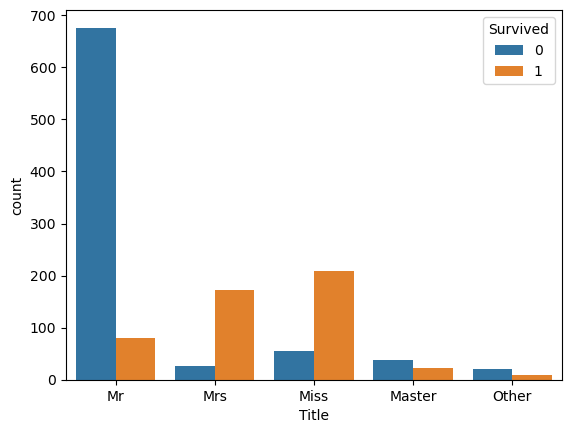

In [1375]:
sns.countplot(x='Title', hue= 'Survived',data=DF, legend=True)

In [1376]:
DF.drop(['Name'], axis=1, inplace=True)
DF

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,NaN,S,Mr
1305,1,1,female,39.0,0,0,108.9000,C105,C,Other
1306,0,3,male,38.5,0,0,7.2500,NaN,S,Mr
1307,0,3,male,NaN,0,0,8.0500,NaN,S,Mr


In [1377]:
# Create FamilySize Feature

DF['FamilySize'] = DF['SibSp'] + DF['Parch'] + 1
DF.drop(['SibSp', 'Parch'], axis=1, inplace=True)
DF

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,NaN,S,Mr,2
1,1,1,female,38.0,71.2833,C85,C,Mrs,2
2,1,3,female,26.0,7.9250,NaN,S,Miss,1
3,1,1,female,35.0,53.1000,C123,S,Mrs,2
4,0,3,male,35.0,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,8.0500,NaN,S,Mr,1
1305,1,1,female,39.0,108.9000,C105,C,Other,1
1306,0,3,male,38.5,7.2500,NaN,S,Mr,1
1307,0,3,male,NaN,8.0500,NaN,S,Mr,1


<Axes: xlabel='FamilySize', ylabel='count'>

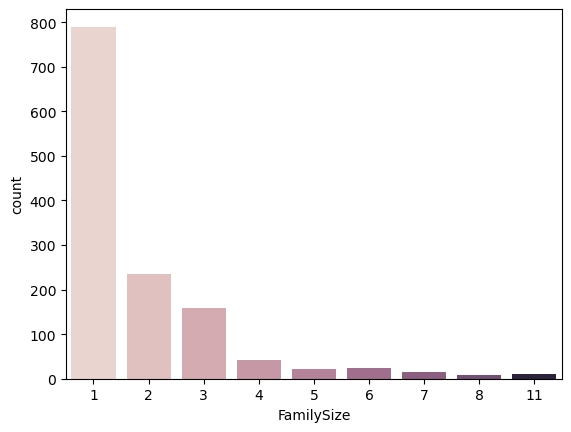

In [1378]:
sns.countplot(x='FamilySize', hue= 'FamilySize',data=DF, legend=False)

In [1379]:
DF['FamilySize'].value_counts()

FamilySize
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: count, dtype: int64

# Handling missing data

In [1380]:
Nan_Value = DF.isnull().sum()
Nan_Value.name = 'Number of Nan Values'
print(pd.DataFrame(Nan_Value))

            Number of Nan Values
Survived                       0
Pclass                         0
Sex                            0
Age                          263
Fare                           1
Cabin                       1014
Embarked                       2
Title                          0
FamilySize                     0


<Axes: >

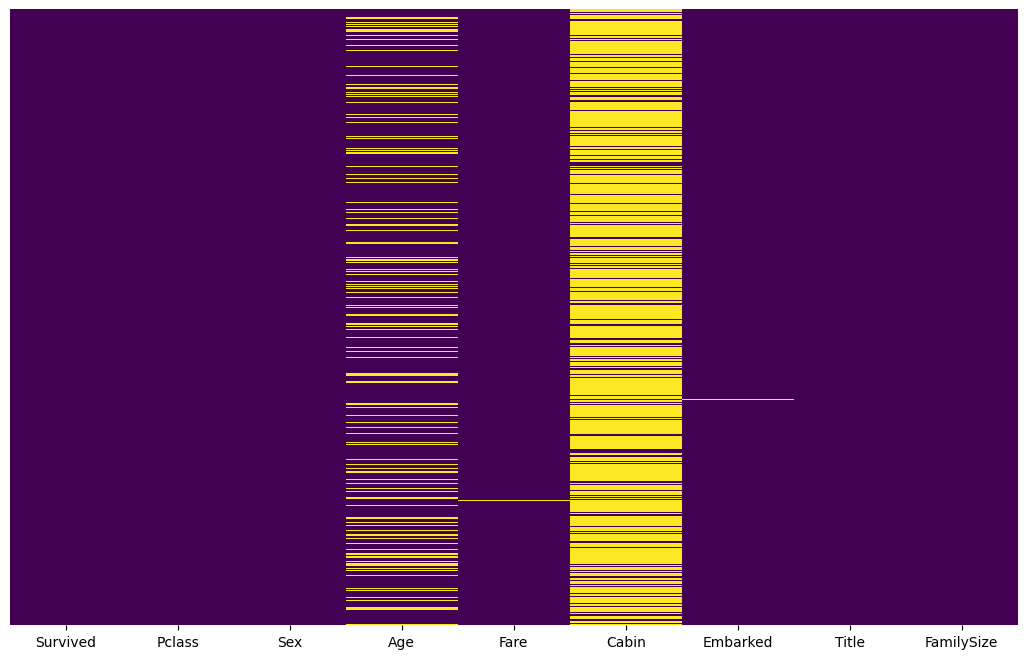

In [1381]:
plt.figure(figsize=(13,8))
sns.heatmap(DF.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Handling Missing Values of Age Feature

Text(0, 0.5, 'Counts')

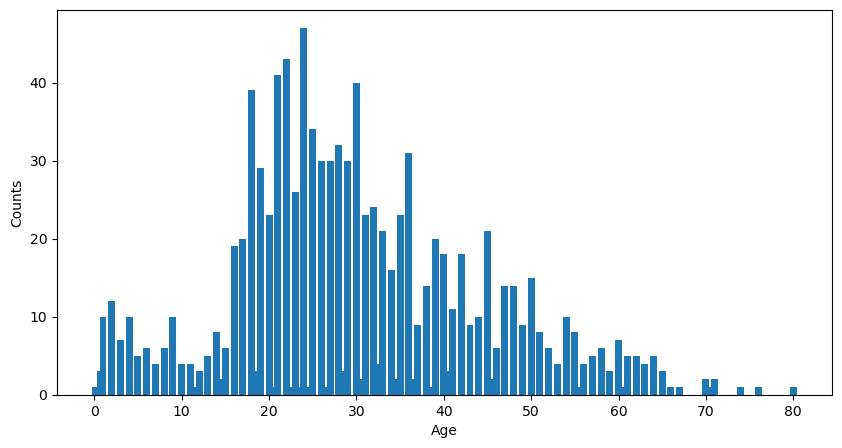

In [1382]:
Age_Befoe_HMV = DF['Age'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(Age_Befoe_HMV.index, Age_Befoe_HMV.values)
plt.xlabel('Age')
plt.ylabel('Counts')

In [1383]:
print('Number of Nan value for Age Feature: ',DF[DF.isnull()['Age']].shape[0])

Number of Nan value for Age Feature:  263


<Axes: xlabel='Survived', ylabel='count'>

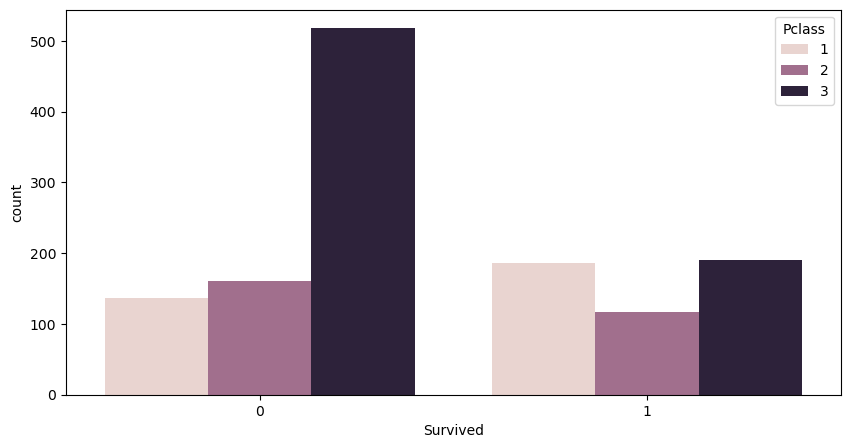

In [1384]:
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', hue = 'Pclass', data=DF)

<Axes: xlabel='Survived', ylabel='count'>

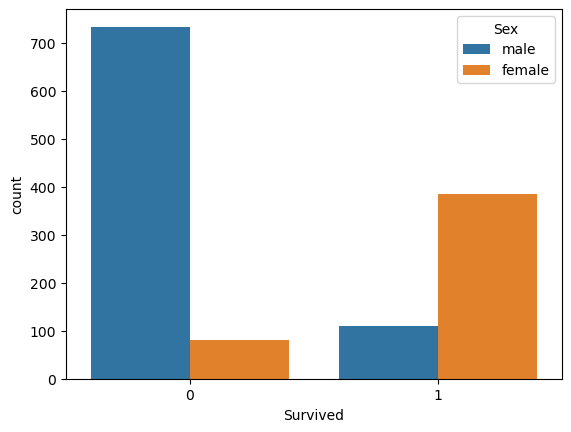

In [1385]:
sns.countplot(x='Survived', hue = 'Sex', data=DF)

<Axes: xlabel='Survived', ylabel='count'>

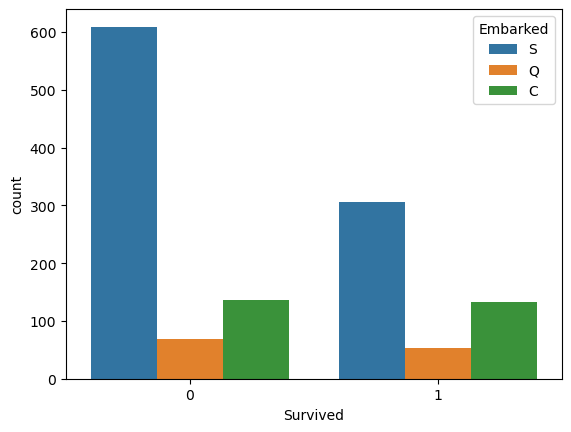

In [1386]:
sns.countplot(x='Survived', hue = 'Embarked', data=DF)

<Axes: xlabel='FamilySize', ylabel='Age'>

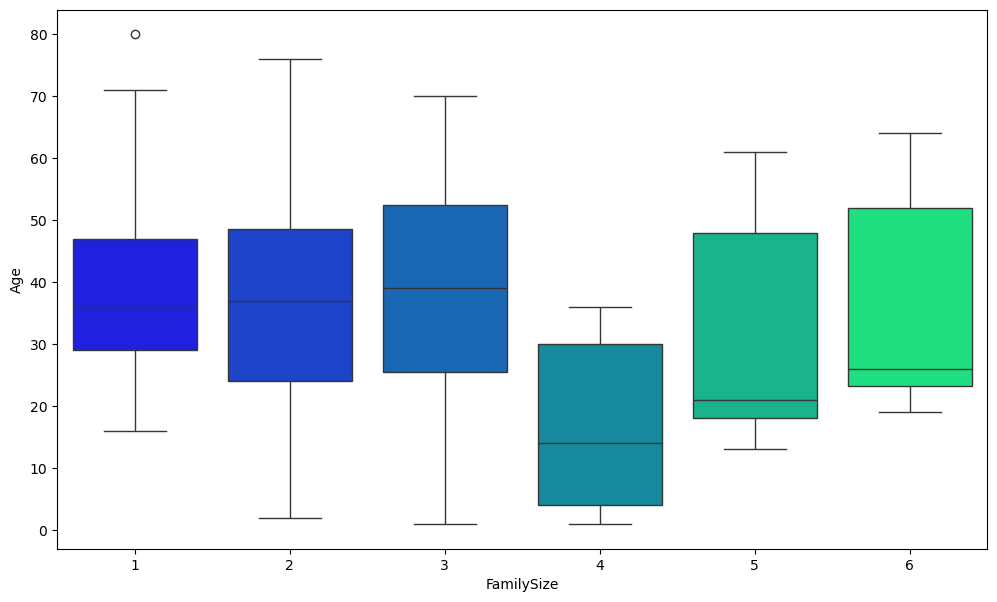

In [1387]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'FamilySize', y = 'Age', data= DF.dropna(axis=0), hue='FamilySize', legend=False,palette = 'winter')

<Axes: xlabel='Title', ylabel='Age'>

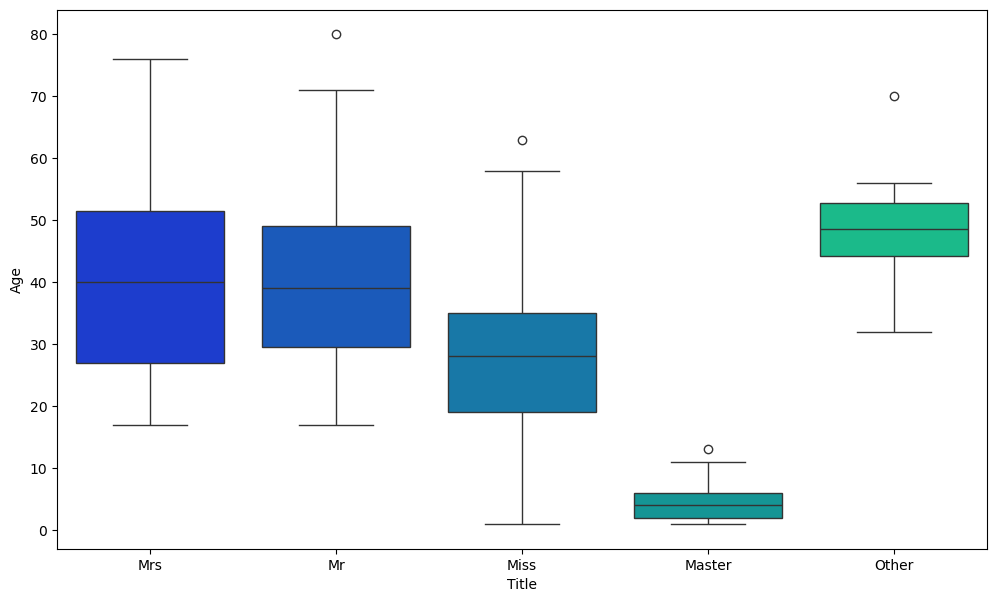

In [1388]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Title', y = 'Age', data= DF.dropna(axis=0), hue='Title', legend=False,palette = 'winter')

<Axes: xlabel='Pclass', ylabel='Age'>

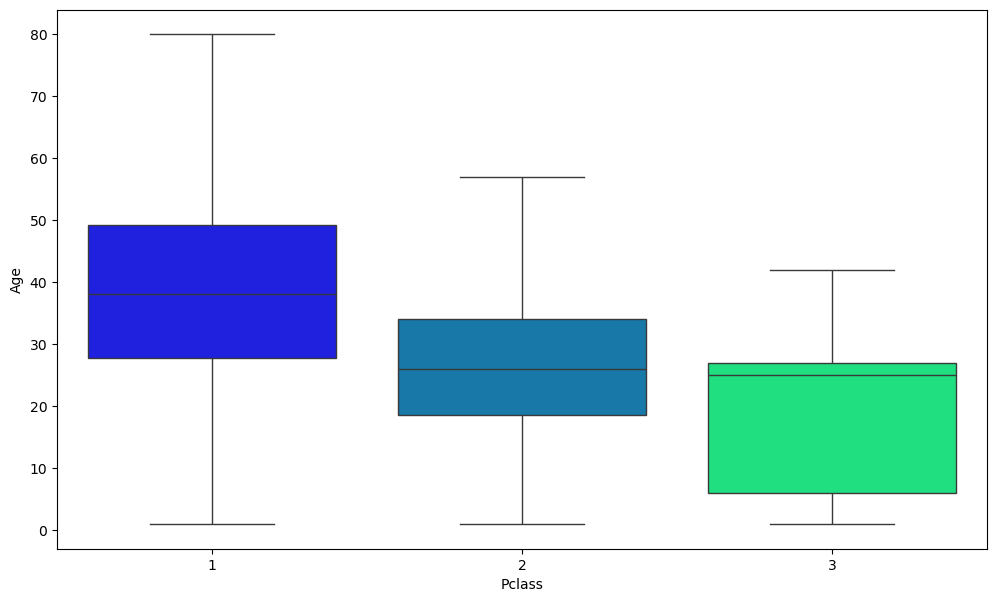

In [1389]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data= DF.dropna(axis=0), hue='Pclass', legend=False,palette = 'winter')

<Axes: xlabel='Sex', ylabel='Age'>

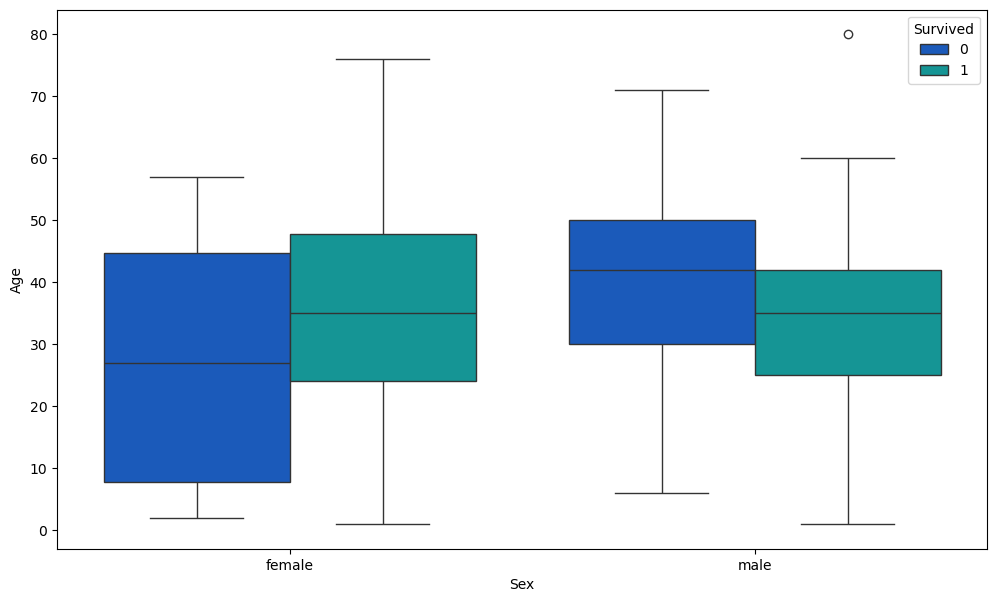

In [1390]:
plt.figure(figsize=(12, 7))
sns.boxplot(x = 'Sex', y = 'Age', data= DF.dropna(axis=0), hue='Survived', legend=True,palette = 'winter')

In [1391]:
DF[DF.isnull()['Age']].groupby(['Pclass','Sex','Title','Survived','Embarked']).size()

Pclass  Sex     Title   Survived  Embarked
1       female  Miss    1         C            1
                Mrs     1         C            5
                                  S            5
        male    Mr      0         C            5
                                  S           17
                        1         C            1
                                  S            4
                Other   0         C            1
2       female  Miss    1         Q            1
                                  S            1
                Mrs     1         S            1
        male    Mr      0         C            3
                                  Q            1
                                  S            7
                        1         C            1
                                  S            1
3       female  Miss    0         C            1
                                  Q            4
                                  S            9
                        1 

In [1392]:
#DF['Age'] = DF['Age'].fillna(DF.groupby(['Pclass','Sex','Title','Survived','Embarked','FamilySize'])['Age'].transform('median'))
DF['Age'] = DF['Age'].fillna(DF.groupby(['Survived','Sex','Title','FamilySize','Pclass','Embarked'])['Age'].transform('median'))

In [1393]:
# There might be rare combinations of Pclass, Title, and FamilySize that have no age data.
DF['Age'] = DF['Age'].fillna(DF.groupby(['Survived', 'Sex','FamilySize'])['Age'].transform('median'))
DF['Age'] = DF['Age'].fillna(DF.groupby(['Survived', 'Sex'])['Age'].transform('median'))

In [1394]:
#def impute_missvalue(cols):
    
#    Age = cols['Age']
#    PClass = cols['Pclass']
#    Sex = cols['Sex']
#    Embarked = cols['Embarked']
    
#    if pd.isnull(Age):

#        if PClass == 1:
#            if Sex == 'male':
#                if Embarked == 'S':
#                    return DF[(DF['Pclass'] == 1) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'S')].Age.median() # another way to find median
#                elif Embarked == 'Q':
#                    return DF[(DF['Pclass'] == 1) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'Q')].Age.median()
#                else:
#                    return DF[(DF['Pclass'] == 1) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'C')].Age.median()
#            else:
#                if Embarked == 'S':
#                    return DF[(DF['Pclass'] == 1) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'S')].Age.median()
#                elif Embarked == 'Q':
#                    return DF[(DF['Pclass'] == 1) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'Q')].Age.median()
#                else:
#                    return DF[(DF['Pclass'] == 1) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'C')].Age.median()
                
            
#        elif PClass == 2:
#            if Sex == 'male':
#                if Embarked == 'S':
#                    return DF[(DF['Pclass'] == 2) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'S')].Age.median()
#                elif Embarked == 'Q':
#                    return DF[(DF['Pclass'] == 2) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'Q')].Age.median()
#                else:
#                    return DF[(DF['Pclass'] == 2) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'C')].Age.median()
#            else:
#                if Embarked == 'S':
#                    return DF[(DF['Pclass'] == 2) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'S')].Age.median()
#                elif Embarked == 'Q':
#                    return DF[(DF['Pclass'] == 2) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'Q')].Age.median()
#                else:
#                    return DF[(DF['Pclass'] == 2) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'C')].Age.median()
            
#        else:
#            if Sex == 'male':
#                if Embarked == 'S':
#                    return DF[(DF['Pclass'] == 3) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'S')].Age.median()
#                elif Embarked == 'Q':
#                    return DF[(DF['Pclass'] == 3) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'Q')].Age.median()
#                else:
#                    return DF[(DF['Pclass'] == 3) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'C')].Age.median()
#            else:
#                if Embarked == 'S':
#                    return DF[(DF['Pclass'] == 3) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'S')].Age.median()
#                elif Embarked == 'Q':
#                    return DF[(DF['Pclass'] == 3) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'Q')].Age.median()
#                else:
#                    return DF[(DF['Pclass'] == 3) & (DF['Sex'] == 'female') & (DF['Embarked'] == 'C')].Age.median()
#    else:
        
#        return Age
#DF['Age'] = DF[['Age','Pclass','Sex','Embarked']].apply(impute_missvalue, axis=1)    

In [1395]:
#def impute_missvalue(cols):
    
#    Age = cols[0]
#    PClass = cols[1]
    
#    if pd.isnull(Age):

#        if PClass == 1:
#            return DF[DF['Pclass'] == 1].Age.median()
            
#        elif PClass == 2:
#            return DF[DF['Pclass'] == 2].Age.median()
            
#        else:
#            return DF[DF['Pclass'] == 3].Age.median()
#    else:
        
#        return Age
#DF['Age'] = DF[['Age','Pclass','Sex','Embarked']].apply(impute_missvalue, axis=1)    

Text(0, 0.5, 'Counts')

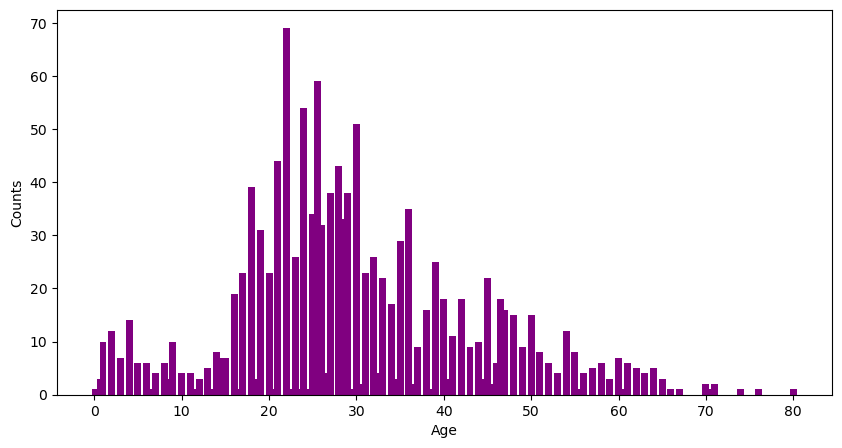

In [1396]:
plt.figure(figsize=(10,5))
plt.bar(DF['Age'].value_counts().index,DF['Age'].value_counts().values, color='purple')
plt.xlabel('Age')
plt.ylabel('Counts')

In [1397]:
print('Number of Nan Age Values: %i '% DF['Age'].isnull().sum())

Number of Nan Age Values: 0 


### Handling Missing Values of Cabin Feature

In [1398]:
DF.drop('Cabin', axis=1, inplace=True)
DF.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1


<Axes: >

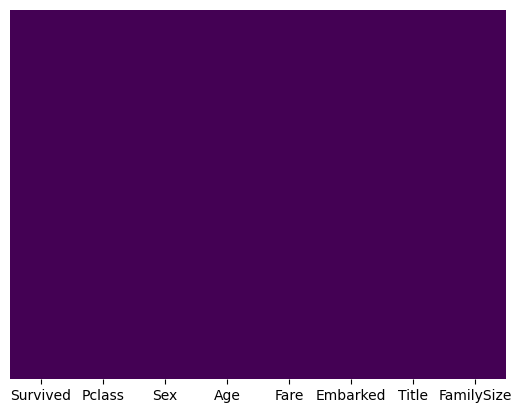

In [1399]:
sns.heatmap(DF.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Handling Missing Values of Embarked Feature

In [1400]:
DF[DF['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
61,1,1,female,38.0,80.0,NaN,Miss,1
829,1,1,female,62.0,80.0,NaN,Mrs,1


In [1401]:
fillnan_Embarked = DF[(DF['Survived'] == 1) & (DF['Pclass'] == 1) & (DF['FamilySize'] == 1) & (DF['Sex'] == 'female')].Embarked.mode()
print(fillnan_Embarked[0])

C


In [1402]:
DF['Embarked'] = DF['Embarked'].fillna(fillnan_Embarked[0])

In [1403]:
print('Number of Nan Embarked Values: %i '% DF['Embarked'].isnull().sum())

Number of Nan Embarked Values: 0 


### Handling Missing Values of Fare Feature

In [1404]:
DF[DF['Fare'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
1043,0,3,male,60.5,NaN,S,Mr,1


In [1405]:
fillnan_Fare=DF[(DF['Survived'] == 0) & (DF['Pclass'] == 3) & (DF['FamilySize'] == 1) & (DF['Sex'] == 'male') & (DF['Embarked'] == 'S')].Fare.median()
print(fillnan_Fare)

7.8958


In [1406]:
DF['Fare'] = DF['Fare'].fillna(fillnan_Fare)

In [1407]:
print('Number of Nan Fare Values: %i '% DF['Fare'].isnull().sum())

Number of Nan Fare Values: 0 


In [1408]:
DF

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...
1304,0,3,male,25.5,8.0500,S,Mr,1
1305,1,1,female,39.0,108.9000,C,Other,1
1306,0,3,male,38.5,7.2500,S,Mr,1
1307,0,3,male,25.5,8.0500,S,Mr,1


In [1409]:
DF.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

# Converting Categorical Features to Numerical

In [1410]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    1309 non-null   int64  
 1   Pclass      1309 non-null   int64  
 2   Sex         1309 non-null   object 
 3   Age         1309 non-null   float64
 4   Fare        1309 non-null   float64
 5   Embarked    1309 non-null   object 
 6   Title       1309 non-null   object 
 7   FamilySize  1309 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


### Object Type

In [1411]:
print('Number of object features before preprocessing: %i '% (DF.select_dtypes(include=['object']).columns.shape[0]))
print('Number of int//float features before preprocessing: %i '% (DF.select_dtypes(include=['int64','float64']).columns.shape[0]))
print(DF.select_dtypes(include=['object']).head())
print(DF.select_dtypes(include=['int64','float64']).head())

Number of object features before preprocessing: 3 
Number of int//float features before preprocessing: 5 
      Sex Embarked Title
0    male        S    Mr
1  female        C   Mrs
2  female        S  Miss
3  female        S   Mrs
4    male        S    Mr
   Survived  Pclass   Age     Fare  FamilySize
0         0       3  22.0   7.2500           2
1         1       1  38.0  71.2833           2
2         1       3  26.0   7.9250           1
3         1       1  35.0  53.1000           2
4         0       3  35.0   8.0500           1


#### Sex

In [1412]:
DF['Sex']

0         male
1       female
2       female
3       female
4         male
         ...  
1304      male
1305    female
1306      male
1307      male
1308      male
Name: Sex, Length: 1309, dtype: object

In [1413]:
DF['Sex'] = DF['Sex'].map({'male':1, 'female':0})

In [1414]:
DF

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,1,22.0,7.2500,S,Mr,2
1,1,1,0,38.0,71.2833,C,Mrs,2
2,1,3,0,26.0,7.9250,S,Miss,1
3,1,1,0,35.0,53.1000,S,Mrs,2
4,0,3,1,35.0,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...
1304,0,3,1,25.5,8.0500,S,Mr,1
1305,1,1,0,39.0,108.9000,C,Other,1
1306,0,3,1,38.5,7.2500,S,Mr,1
1307,0,3,1,25.5,8.0500,S,Mr,1


#### Embarked

In [1415]:
DF['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1416]:
onehotencoder = OneHotEncoder(sparse_output=False)
Embarked_labels = onehotencoder.fit_transform(DF[['Embarked']])
Embarked_labels_DF = pd.DataFrame(Embarked_labels, columns=onehotencoder.get_feature_names_out(['Embarked']))
DF = pd.concat([DF.drop('Embarked', axis=1), Embarked_labels_DF], axis=1)

In [1417]:
DF

,Survived,Pclass,Sex,Age,Fare,Title,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,Mr,2,0.0,0.0,1.0
1,1,1,0,38.0,71.2833,Mrs,2,1.0,0.0,0.0
2,1,3,0,26.0,7.9250,Miss,1,0.0,0.0,1.0
3,1,1,0,35.0,53.1000,Mrs,2,0.0,0.0,1.0
4,0,3,1,35.0,8.0500,Mr,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,25.5,8.0500,Mr,1,0.0,0.0,1.0
1305,1,1,0,39.0,108.9000,Other,1,1.0,0.0,0.0
1306,0,3,1,38.5,7.2500,Mr,1,0.0,0.0,1.0
1307,0,3,1,25.5,8.0500,Mr,1,0.0,0.0,1.0


#### Title

In [1418]:
DF['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [1419]:
Title_labels = onehotencoder.fit_transform(DF[['Title']])
Title_labels_DF = pd.DataFrame(Title_labels, columns=onehotencoder.get_feature_names_out(['Title']))
DF = pd.concat([DF.drop('Title', axis=1), Title_labels_DF], axis=1)

In [1420]:
DF

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,22.0,7.2500,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1,0,38.0,71.2833,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,0,26.0,7.9250,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,35.0,53.1000,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,1,35.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,1,25.5,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1305,1,1,0,39.0,108.9000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1306,0,3,1,38.5,7.2500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1307,0,3,1,25.5,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Int/Float Type

In [1421]:
Pclass_labels = onehotencoder.fit_transform(DF[['Pclass']])
Pclass_labels_DF = pd.DataFrame(Pclass_labels, columns=onehotencoder.get_feature_names_out(['Pclass']))
DF = pd.concat([DF.drop('Pclass', axis=1), Pclass_labels_DF], axis=1)
DF

,Survived,Sex,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0,38.0,71.2833,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0,26.0,7.9250,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0,35.0,53.1000,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,35.0,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,25.5,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1305,1,0,39.0,108.9000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1306,0,1,38.5,7.2500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1307,0,1,25.5,8.0500,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [1422]:
print(f'Number of data : {DF.shape[0]}')
print(f'Number of Features : {DF.shape[1]}')

Number of data : 1309
Number of Features : 16


In [1423]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      1309 non-null   int64  
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   Fare          1309 non-null   float64
 4   FamilySize    1309 non-null   int64  
 5   Embarked_C    1309 non-null   float64
 6   Embarked_Q    1309 non-null   float64
 7   Embarked_S    1309 non-null   float64
 8   Title_Master  1309 non-null   float64
 9   Title_Miss    1309 non-null   float64
 10  Title_Mr      1309 non-null   float64
 11  Title_Mrs     1309 non-null   float64
 12  Title_Other   1309 non-null   float64
 13  Pclass_1      1309 non-null   float64
 14  Pclass_2      1309 non-null   float64
 15  Pclass_3      1309 non-null   float64
dtypes: float64(13), int64(3)
memory usage: 163.8 KB


# Outliers

<Axes: xlabel='Age', ylabel='Count'>

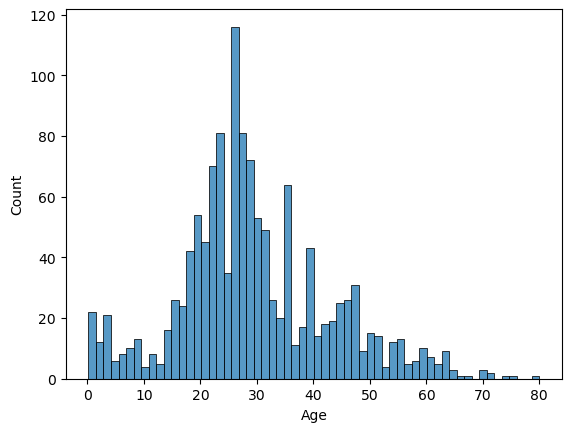

In [1424]:
# Age
sns.histplot(DF['Age'],kde=False,bins=60)

<Axes: xlabel='Fare', ylabel='Count'>

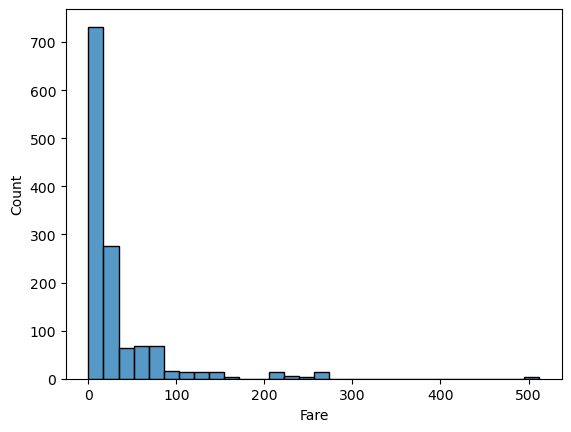

In [1425]:
# Fare
sns.histplot(DF['Fare'],kde=False,bins=30)

In [1426]:
# IQR

def detect_outliers_IQR(data):
    outliers = {}
    outliers = {'index':[], 'value':[]}

    quantile1, quantile3= np.percentile(data,[25,75])
    iqr_value=quantile3-quantile1
    lower_bound_val = quantile1 - (1.5 * iqr_value) 
    upper_bound_val = quantile3 + (1.5 * iqr_value) 

    for index,value in enumerate(data):
        if value > upper_bound_val:
            outliers['index'].append(index)
            outliers['value'].append(value)
        elif value < lower_bound_val:
            outliers['index'].append(index)
            outliers['value'].append(value)

    return outliers

In [1427]:
# Using Z-score

def detect_outliers_ZS(data):
    outliers = {}
    outliers = {'index':[], 'value':[]}

    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for index,value in enumerate(data):
        z_score = (value - mean)/std
        if np.abs(z_score) > threshold:
            outliers['index'].append(index)
            outliers['value'].append(value)

    return outliers


In [1428]:
#Frequency categorical Features

def detect_outliers_freq(data):
    outlier_class=[]
    calss_prop = data.value_counts(normalize=True).reset_index()
    num_class = len(calss_prop)

    for i in range(num_class):
        if calss_prop.iloc[i,1] < 0.01:
            outlier_class.append(calss_prop.iloc[i,0])
                                 
    outliers = {'index':[], 'value':[]}
    for j in outlier_class:
        outliers['index'].extend(data[(data == j)].index)
        outliers['value'].extend(data[(data == j)].values)    
    
    return outliers

In [1429]:
outliers_Age = detect_outliers_ZS(DF['Age'])
print(outliers_Age)
outliers_Fare = detect_outliers_ZS(DF['Fare'])
print(outliers_Fare)

{'index': [96, 116, 493, 630, 851, 987], 'value': [71.0, 70.5, 71.0, 80.0, 74.0, 76.0]}
{'index': [27, 88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689, 700, 716, 730, 737, 742, 779, 915, 944, 950, 955, 960, 965, 966, 972, 1005, 1033, 1047, 1075, 1093, 1109, 1215, 1234, 1266, 1298], 'value': [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375, 262.375, 263.0, 262.375, 262.375, 263.0, 211.5, 211.5, 221.7792, 221.7792, 262.375, 221.7792, 247.5208, 227.525, 211.5, 211.3375, 512.3292, 262.375, 211.5]}


#### These data are not outliers; they are true and correct, but they are extreme. They can be transformed by Box-Cox or log.

Lambda value used for Transformation: 0.7659747725497161


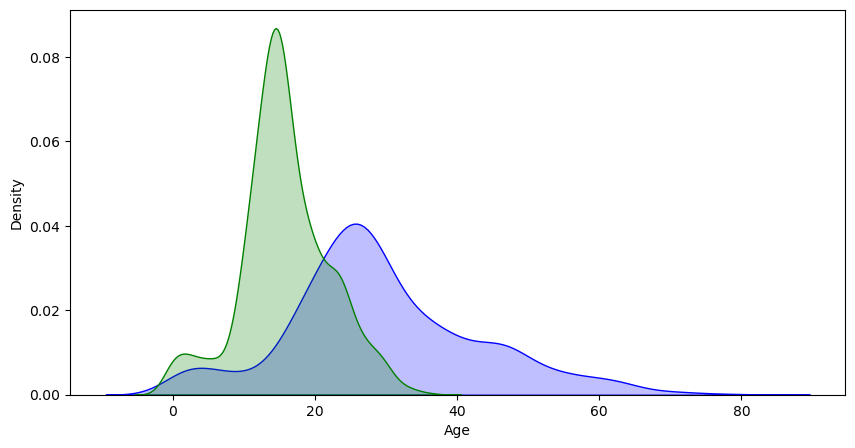

In [1430]:
# Transformed Age Feature
Age_BoxCox, Lambda_BoxCox_Age = stats.boxcox(DF['Age'])

plt.figure(figsize=(10,5))

sns.kdeplot(data=DF, x='Age', fill=True, linewidth=1, color="blue", label='Original Distribution')

sns.kdeplot(x=Age_BoxCox, fill=True, linewidth=1, color="green", label='Transformed Distribution')

print(f"Lambda value used for Transformation: {Lambda_BoxCox_Age}")

Lambda value used for Transformation: 0.20396139037035574


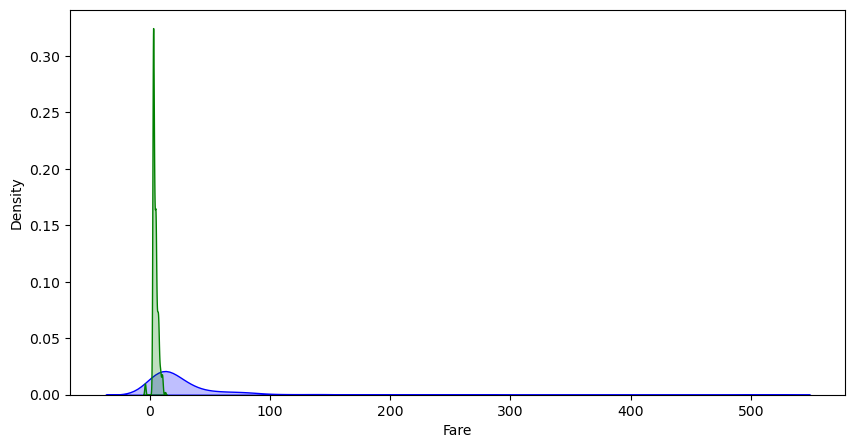

In [1431]:
# Transformed Fare Feature
Fare_BoxCox, Lambda_BoxCox_Fare = stats.boxcox(DF['Fare']+0.0001) # Because X must be X >= 0

plt.figure(figsize=(10,5))

sns.kdeplot(data=DF, x='Fare', fill=True, linewidth=1, color="blue", label='Original Distribution')

sns.kdeplot(x=Fare_BoxCox, fill=True, linewidth=1, color="green", label='Transformed Distribution')

print(f"Lambda value used for Transformation: {Lambda_BoxCox_Fare}")

In [1432]:
DF['Transformed_Age'] = np.round(Age_BoxCox, decimals=2)
DF['Transformed_Fare'] = np.round(Fare_BoxCox, decimals=2)
DF = DF.drop(['Age', 'Fare'], axis=1)
DF

,Survived,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
0,0,1,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.63,2.44
1,1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.87,6.80
2,1,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14.53,2.58
3,1,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.58,6.12
4,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.58,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.30,2.60
1305,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,20.30,7.86
1306,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,20.08,2.44
1307,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.30,2.60


In [1433]:
# Checking for nan value after transformation and concatenation
DF.isnull().sum()

Survived            0
Sex                 0
FamilySize          0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Other         0
Pclass_1            0
Pclass_2            0
Pclass_3            0
Transformed_Age     0
Transformed_Fare    0
dtype: int64

In [1434]:
#Outliers = list(set(outliers_Age['index'] + outliers_Fare['index']))
#print('Number of Outlier data: ', len(Outliers))
#DF.drop(Outliers, axis=0, inplace=True)
#print(f'Number of data After removing outliers: {DF.shape[0]}')
#DF = DF.reset_index()
#DF.drop('index', axis=1, inplace=True)
#DF

# Test Train

In [1435]:
X = DF.drop('Survived',axis=1)
y = DF['Survived']

In [1436]:
X.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
0,1,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.63,2.44
1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.87,6.80
2,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14.53,2.58
3,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.58,6.12
4,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.58,2.60


In [1437]:
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [1438]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size= 0.30, shuffle=True)

In [1439]:
x_train.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
1214,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,17.70,4.67
677,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.64,2.91
534,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.36,2.71
1174,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.72,3.64
864,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.59,3.37


In [1440]:
x_test.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
1148,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15.45,2.60
1049,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,21.56,4.67
982,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.30,2.55
808,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20.30,3.37
1195,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.63,2.54


In [1441]:
print(f'Number of train data After Preprocessing: {x_train.shape[0]}')
print(f'Number of train Features After Preprocessing: {x_train.shape[1]}')

Number of train data After Preprocessing: 916
Number of train Features After Preprocessing: 15


In [1442]:
print(f'Number of test data After Preprocessing: {x_test.shape[0]}')
print(f'Number of test Features After Preprocessing: {x_test.shape[1]}')

Number of test data After Preprocessing: 393
Number of test Features After Preprocessing: 15


# Normalization

In [1443]:
x_train_UnNor = x_train.copy()
x_test_UnNor = x_test.copy()
minmaxscale = MinMaxScaler()
minmaxscale.fit(x_train[['Transformed_Age','Transformed_Fare','FamilySize']])
x_train[['Transformed_Age','Transformed_Fare','FamilySize']] = minmaxscale.transform(x_train[['Transformed_Age','Transformed_Fare','FamilySize']])
x_test[['Transformed_Age','Transformed_Fare','FamilySize']] = minmaxscale.transform(x_test[['Transformed_Age','Transformed_Fare','FamilySize']])

In [1444]:
x_train.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
1214,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.523262,0.526567
677,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.325392,0.421493
534,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.485706,0.409552
1174,0,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.187500,0.465075
864,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.408072,0.448955


In [1445]:
x_test.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
1148,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.460202,0.402985
1049,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.631446,0.526567
982,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.427971,0.400000
808,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.596132,0.448955
1195,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.381166,0.399403


In [1446]:
x_train_UnNor.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
1214,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,17.70,4.67
677,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.64,2.91
534,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,16.36,2.71
1174,0,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.72,3.64
864,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13.59,3.37


In [1447]:
x_test_UnNor.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
1148,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,15.45,2.60
1049,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,21.56,4.67
982,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,14.30,2.55
808,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,20.30,3.37
1195,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.63,2.54


In [1448]:
X.head()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
0,1,2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,12.63,2.44
1,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,19.87,6.80
2,0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,14.53,2.58
3,0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,18.58,6.12
4,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,18.58,2.60


# Feature Selection

#### Constant Feature

In [1449]:
# Constant Feature
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(x_train)

VarianceThreshold(threshold=0)

In [1450]:
print('Number of remain features: ', variance_threshold.get_support().sum())

Number of remain features:  15


In [1451]:
print('Names of remain features: ', variance_threshold.get_feature_names_out())

Names of remain features:  ['Sex' 'FamilySize' 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Title_Master'
 'Title_Miss' 'Title_Mr' 'Title_Mrs' 'Title_Other' 'Pclass_1' 'Pclass_2'
 'Pclass_3' 'Transformed_Age' 'Transformed_Fare']


#### Correlation

<Axes: >

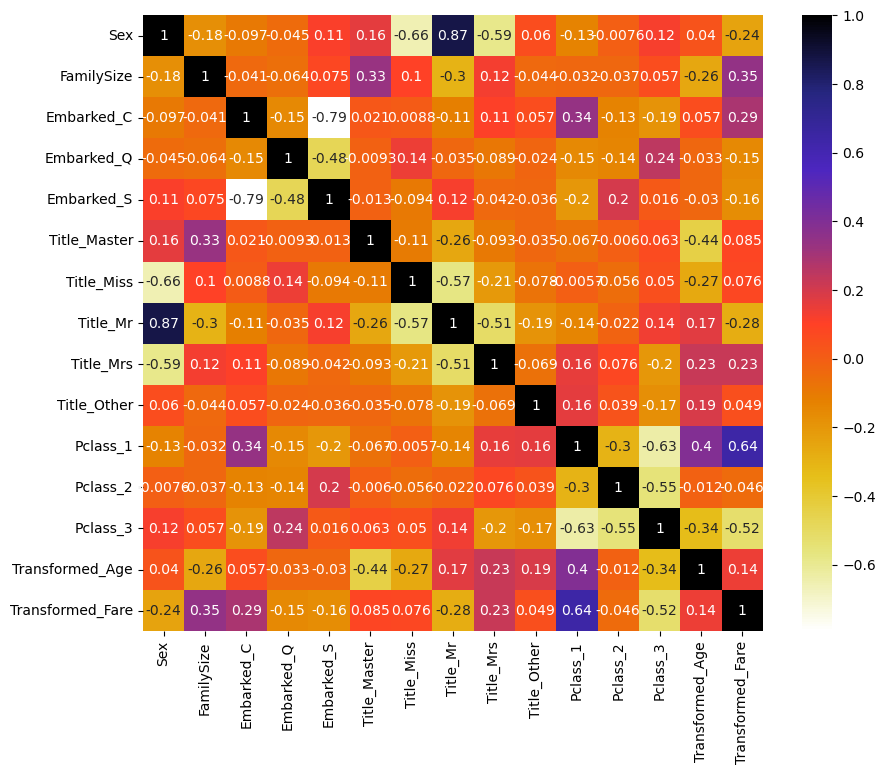

In [1452]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [1453]:
x_train.corr()

,Sex,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Pclass_1,Pclass_2,Pclass_3,Transformed_Age,Transformed_Fare
Sex,1.000000,-0.176153,-0.096708,-0.044990,0.113660,0.159758,-0.658470,0.870639,-0.585192,0.060027,-0.131500,-0.007650,0.121386,0.039955,-0.244008
FamilySize,-0.176153,1.000000,-0.040611,-0.063971,0.075478,0.331657,0.102999,-0.299169,0.124626,-0.043901,-0.031605,-0.036725,0.057487,-0.259319,0.345369
Embarked_C,-0.096708,-0.040611,1.000000,-0.154519,-0.793825,0.021349,0.008777,-0.114273,0.108656,0.057206,0.335042,-0.131074,-0.187078,0.056609,0.288358
Embarked_Q,-0.044990,-0.063971,-0.154519,1.000000,-0.478182,-0.009293,0.140270,-0.034784,-0.088781,-0.023963,-0.152351,-0.136226,0.243999,-0.032539,-0.149181
Embarked_S,0.113660,0.075478,-0.793825,-0.478182,1.000000,-0.013258,-0.094144,0.122992,-0.041940,-0.036102,-0.204053,0.200369,0.016109,-0.030293,-0.164505
Title_Master,0.159758,0.331657,0.021349,-0.009293,-0.013258,1.000000,-0.105196,-0.255360,-0.093489,-0.034740,-0.066714,-0.005996,0.063300,-0.436946,0.084873
Title_Miss,-0.658470,0.102999,0.008777,0.140270,-0.094144,-0.105196,1.000000,-0.573290,-0.209886,-0.077992,-0.005699,-0.055640,0.050148,-0.268174,0.075925
Title_Mr,0.870639,-0.299169,-0.114273,-0.034784,0.122992,-0.255360,-0.573290,1.000000,-0.509491,-0.189323,-0.135521,-0.021740,0.136343,0.169399,-0.278421
Title_Mrs,-0.585192,0.124626,0.108656,-0.088781,-0.041940,-0.093489,-0.209886,-0.509491,1.000000,-0.069312,0.158342,0.076251,-0.200572,0.225806,0.226182
Title_Other,0.060027,-0.043901,0.057206,-0.023963,-0.036102,-0.034740,-0.077992,-0.189323,-0.069312,1.000000,0.161358,0.038872,-0.172877,0.191923,0.048604


#### Mutual Information

In [1454]:
categorical_DF = list(x_train.columns)
categorical_DF.remove('Transformed_Age')
categorical_DF.remove('Transformed_Fare')
categorical_DF.remove('FamilySize')

In [1455]:
categorical_feature_indices = [x_train.columns.get_loc(col) for col in categorical_DF]
categorical_feature_indices

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [1456]:
# Mutual Information
mutual_info = mutual_info_classif(x_train,y_train, discrete_features=categorical_feature_indices)
mutual_info

array([2.47745936e-01, 3.18677277e-03, 1.15817657e-02, 4.65590782e-06,
       8.99222154e-03, 1.83931118e-05, 7.51318627e-02, 2.26782376e-01,
       1.10292140e-01, 4.60133680e-05, 3.05989522e-02, 7.13875788e-04,
       3.14455588e-02, 7.32812977e-02, 9.74420196e-02])

Sex                 0.247746
Title_Mr            0.226782
Title_Mrs           0.110292
Transformed_Fare    0.097442
Title_Miss          0.075132
Transformed_Age     0.073281
Pclass_3            0.031446
Pclass_1            0.030599
dtype: float64
Number of selected features: 8


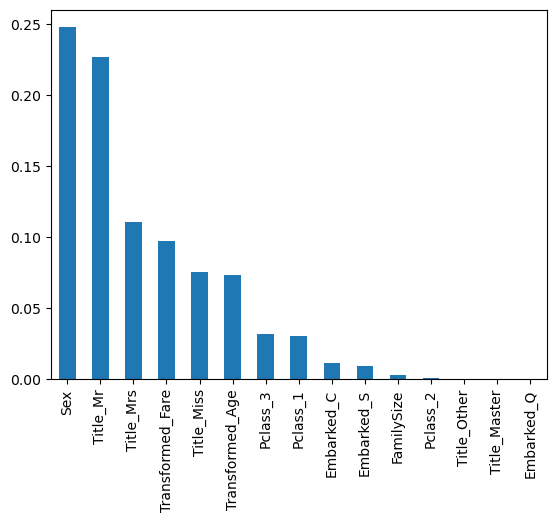

In [1457]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False).plot.bar()
mutual_info_all_selected = mutual_info[mutual_info > 0.03]
print(mutual_info_all_selected.sort_values(ascending=False))
print('Number of selected features: %i' % len(mutual_info_all_selected))

In [1458]:
# Choose Selected Feature For X_train and X_test
x_UnNor_mutual_info = X[mutual_info_all_selected.index]
x_UnNor_mutual_info.shape

(1309, 8)

In [1459]:
x_UnNor_mutual_info.head()

,Sex,Title_Miss,Title_Mr,Title_Mrs,Pclass_1,Pclass_3,Transformed_Age,Transformed_Fare
0,1,0.0,1.0,0.0,0.0,1.0,12.63,2.44
1,0,0.0,0.0,1.0,1.0,0.0,19.87,6.80
2,0,1.0,0.0,0.0,0.0,1.0,14.53,2.58
3,0,0.0,0.0,1.0,1.0,0.0,18.58,6.12
4,1,0.0,1.0,0.0,0.0,1.0,18.58,2.60


#### Chi2

In [1460]:
# This Dataset has continuous features, so we don't apply chi2 without Binned Continuous. We just now do it to practice the Python command..
f_p_values=chi2(x_train,y_train)
f_p_values

(array([1.51735653e+02, 6.04710047e-01, 1.73112787e+01, 7.79116482e-03,
        4.83734040e+00, 3.23297793e-02, 1.12835124e+02, 1.62834897e+02,
        1.65333379e+02, 8.13194332e-02, 4.26162645e+01, 1.04681434e+00,
        2.64795173e+01, 4.94729343e-02, 2.51881617e+00]),
 array([7.23771461e-35, 4.36786552e-01, 3.17297978e-05, 9.29664010e-01,
        2.78498150e-02, 8.57305786e-01, 2.34484930e-26, 2.71825636e-37,
        7.73543074e-38, 7.75517255e-01, 6.66032681e-11, 3.06241916e-01,
        2.66347303e-07, 8.23982958e-01, 1.12495009e-01]))

In [1461]:
p_values = pd.Series(f_p_values[1])
p_values.index = x_train.columns
p_values.sort_values(ascending=True)

Title_Mrs           7.735431e-38
Title_Mr            2.718256e-37
Sex                 7.237715e-35
Title_Miss          2.344849e-26
Pclass_1            6.660327e-11
Pclass_3            2.663473e-07
Embarked_C          3.172980e-05
Embarked_S          2.784981e-02
Transformed_Fare    1.124950e-01
Pclass_2            3.062419e-01
FamilySize          4.367866e-01
Title_Other         7.755173e-01
Transformed_Age     8.239830e-01
Title_Master        8.573058e-01
Embarked_Q          9.296640e-01
dtype: float64

#### Feature Importance

In [1462]:
etc = ExtraTreesClassifier()
etc.fit(x_train_UnNor,y_train)
etc.feature_importances_

array([0.21662998, 0.05399443, 0.00671568, 0.00509384, 0.00832434,
       0.0109428 , 0.04669492, 0.14117418, 0.07074304, 0.00499707,
       0.02454498, 0.00864442, 0.02724088, 0.21287147, 0.16138797])

<Axes: >

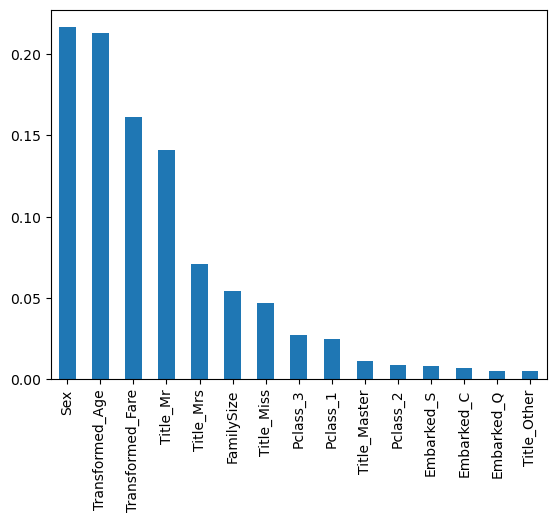

In [1463]:
rank_etc = pd.Series(etc.feature_importances_, index=x_train.columns)
rank_etc.sort_values(ascending=False).plot(kind='bar')

Transformed_Age     0.212761
Sex                 0.192271
Transformed_Fare    0.177852
Title_Mr            0.141358
Title_Mrs           0.074097
FamilySize          0.061897
Title_Miss          0.051543
Pclass_3            0.027174
Pclass_1            0.014944
Embarked_C          0.009890
Embarked_S          0.009053
Pclass_2            0.008992
Title_Master        0.006688
Embarked_Q          0.006082
Title_Other         0.005398
dtype: float64


<Axes: >

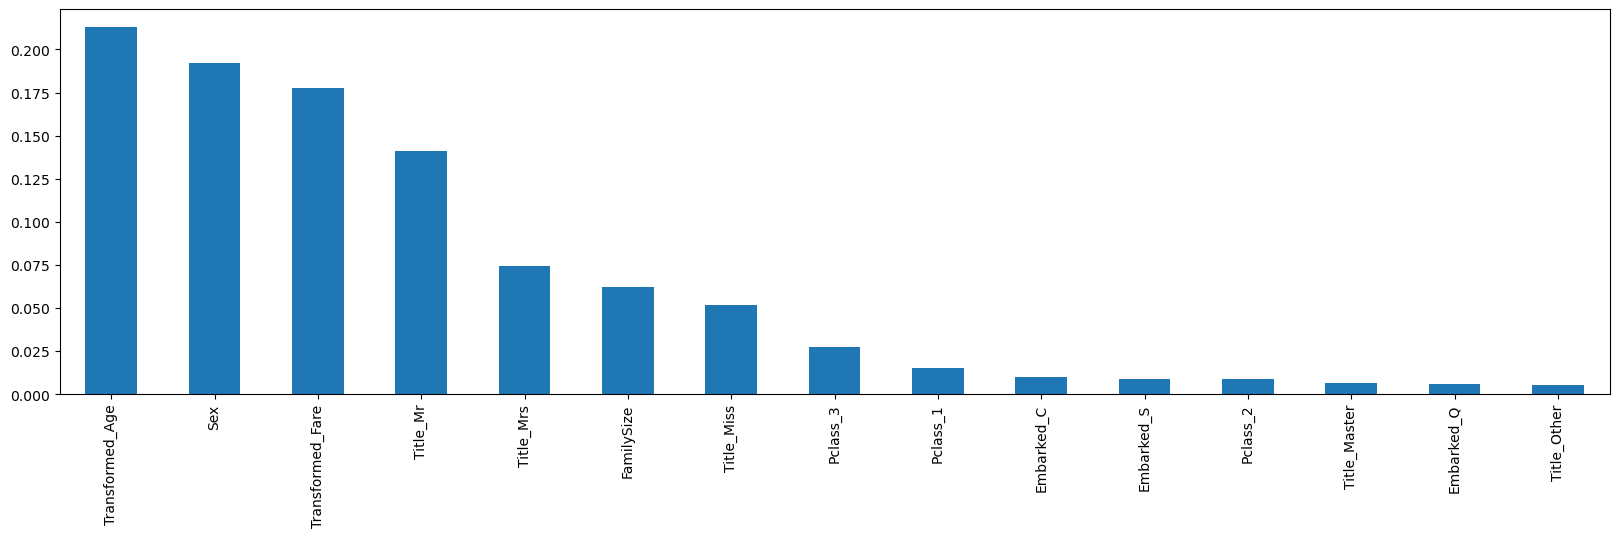

In [1464]:
# RandomForest Classifier

model_RF = RandomForestClassifier(n_estimators = 100,random_state=42)
model_RF.fit(x_train_UnNor, y_train)

feature_importance_RF = pd.Series(model_RF.feature_importances_, index = x_train.columns)
print(feature_importance_RF.sort_values(ascending=False))
feature_importance_RF.sort_values(ascending=False).plot.bar(figsize = (20,5))

Number of selected features: 8


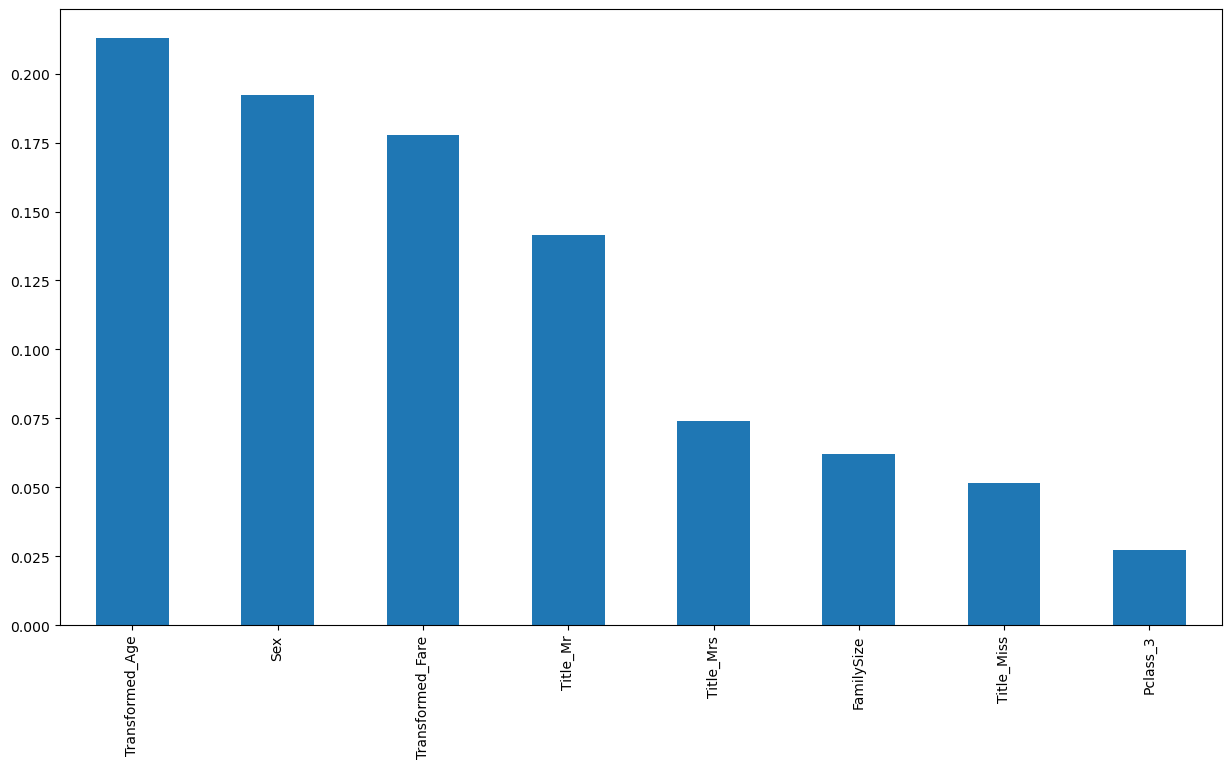

In [1465]:
feature_importance_RF_selected = feature_importance_RF[ feature_importance_RF > 0.025]
feature_importance_RF_selected.sort_values(ascending=False).plot.bar(figsize=(15,8))
print('Number of selected features: %i' % len(feature_importance_RF_selected))

In [1466]:
# Choose Selected Feature For X_train and X_test
x_UnNor_rf_feature_impor = X[feature_importance_RF_selected.index]
x_UnNor_rf_feature_impor.shape

(1309, 8)

#### Sequential Feature Selector

In [1467]:
# backward forward selection
knn = KNeighborsClassifier(n_neighbors=3)
sfs_KNN = SFS(knn, 
          k_features='best', 
          forward=False, 
          floating=True, 
          scoring='f1',
          cv=StratifiedKFold(5, shuffle=True, random_state=42),
          n_jobs=-1)

In [1468]:
sfs_KNN.fit(x_train,y_train)

SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                          estimator=KNeighborsClassifier(n_neighbors=3),
                          floating=True, forward=False, k_features=(1, 15),
                          n_jobs=-1, scoring='f1')

In [1469]:
pd.DataFrame.from_dict(sfs_KNN.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7913669064748201, 0.7969924812030075, 0.762...",0.77865,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.019333,0.015042,0.007521
14,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[0.8345323741007195, 0.8148148148148148, 0.8, ...",0.799123,"(Sex, Embarked_C, Embarked_Q, Embarked_S, Titl...",0.037671,0.029309,0.014655
13,"(0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14)","[0.8345323741007195, 0.8148148148148148, 0.8, ...",0.801948,"(Sex, Embarked_C, Embarked_Q, Embarked_S, Titl...",0.035344,0.027499,0.01375
12,"(0, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14)","[0.8345323741007195, 0.8235294117647058, 0.791...",0.803119,"(Sex, Embarked_C, Embarked_Q, Embarked_S, Titl...",0.037656,0.029297,0.014649
11,"(0, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14)","[0.8345323741007195, 0.8235294117647058, 0.791...",0.804801,"(Sex, Embarked_C, Embarked_Q, Embarked_S, Titl...",0.038713,0.03012,0.01506
10,"(0, 2, 3, 5, 6, 10, 11, 12, 13, 14)","[0.8345323741007195, 0.8235294117647058, 0.791...",0.805536,"(Sex, Embarked_C, Embarked_Q, Title_Master, Ti...",0.037064,0.028837,0.014418
9,"(0, 3, 5, 6, 10, 11, 12, 13, 14)","[0.8201438848920863, 0.8333333333333334, 0.793...",0.809995,"(Sex, Embarked_Q, Title_Master, Title_Miss, Pc...",0.021469,0.016704,0.008352
8,"(0, 3, 6, 10, 11, 12, 13, 14)","[0.8260869565217391, 0.8333333333333334, 0.793...",0.810574,"(Sex, Embarked_Q, Title_Miss, Pclass_1, Pclass...",0.026338,0.020492,0.010246
7,"(0, 3, 8, 10, 11, 13, 14)","[0.8260869565217391, 0.8333333333333334, 0.803...",0.812401,"(Sex, Embarked_Q, Title_Mrs, Pclass_1, Pclass_...",0.0248,0.019295,0.009648
6,"(0, 1, 2, 3, 4, 13)","[0.7769784172661871, 0.8405797101449275, 0.816...",0.808239,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.030716,0.023898,0.011949


In [1470]:
print(f"Best score achieved: {sfs_KNN.k_score_:.4f}")
print(f"Selected feature names: {sfs_KNN.k_feature_names_}")

Best score achieved: 0.8124
Selected feature names: ('Sex', 'Embarked_Q', 'Title_Mrs', 'Pclass_1', 'Pclass_2', 'Transformed_Age', 'Transformed_Fare')


In [1471]:
# Choose Selected Feature For X_train and X_test
x_UnNor_sfs_KNN = X[list(sfs_KNN.k_feature_names_)]
x_UnNor_sfs_KNN.shape

(1309, 7)

In [1472]:
model_svr_SFS = SVC(kernel='rbf', C=1.0)

sfs__svr = SFS(model_svr_SFS, 
          k_features='best', 
          forward=False, 
          floating=True, 
          scoring='f1',
          cv=StratifiedKFold(5, shuffle=True, random_state=42),
          n_jobs=-1)

sfs__svr = sfs__svr.fit(x_train, y_train)

In [1473]:
pd.DataFrame.from_dict(sfs__svr.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7910447761194029, 0.8549618320610687, 0.802...",0.809759,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.030369,0.023628,0.011814
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14)","[0.7910447761194029, 0.8636363636363636, 0.802...",0.811494,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.034659,0.026966,0.013483
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14)","[0.7910447761194029, 0.8721804511278195, 0.802...",0.813203,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.038922,0.030283,0.015141
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)","[0.7910447761194029, 0.8721804511278195, 0.802...",0.813203,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.038922,0.030283,0.015141
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12)","[0.7910447761194029, 0.8636363636363636, 0.802...",0.811494,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.034659,0.026966,0.013483
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 12)","[0.7910447761194029, 0.8636363636363636, 0.802...",0.811494,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.034659,0.026966,0.013483
9,"(0, 1, 2, 3, 4, 5, 6, 8, 12)","[0.7910447761194029, 0.8636363636363636, 0.808...",0.81324,"(Sex, FamilySize, Embarked_C, Embarked_Q, Emba...",0.034952,0.027194,0.013597
8,"(0, 1, 2, 4, 5, 6, 8, 12)","[0.7910447761194029, 0.8636363636363636, 0.808...",0.81324,"(Sex, FamilySize, Embarked_C, Embarked_S, Titl...",0.034952,0.027194,0.013597
7,"(0, 1, 2, 5, 6, 8, 12)","[0.7851851851851852, 0.8636363636363636, 0.808...",0.812632,"(Sex, FamilySize, Embarked_C, Title_Master, Ti...",0.035689,0.027767,0.013884
6,"(0, 1, 2, 5, 8, 12)","[0.7910447761194029, 0.8636363636363636, 0.808...",0.813803,"(Sex, FamilySize, Embarked_C, Title_Master, Ti...",0.034301,0.026687,0.013343


In [1474]:
print(f"Best score achieved: {sfs__svr.k_score_:.4f}")
print(f"Selected feature names: {sfs__svr.k_feature_names_}")

Best score achieved: 0.8138
Selected feature names: ('Sex', 'FamilySize', 'Embarked_C', 'Title_Master', 'Title_Mrs', 'Pclass_3')


In [1475]:
# Choose Selected Feature For X_train and X_test
x_UnNor_sfs__svr = X[list(sfs__svr.k_feature_names_)]
x_UnNor_sfs__svr.shape

(1309, 6)

#### RECURSIVE FEATURE ELIMINATION

In [1476]:
svm_linear = SVC(kernel="linear")
rfe_svml = RFECV(svm_linear, cv = StratifiedKFold(5, shuffle=True, random_state=42), scoring='f1') 
values_svr = rfe_svml.fit(x_train,y_train)

In [1477]:
print("Num Features: %s" % (values_svr.n_features_))
print("Selected Features: %s" % (values_svr.support_))
print("Feature Ranking: %s" % (values_svr.ranking_)) 
print("Selected Feature names: %s" % (values_svr.get_feature_names_out()))  

x_UnNor_svr_rfecv = X[values_svr.get_feature_names_out()]
x_UnNor_svr_rfecv.shape

Num Features: 1
Selected Features: [ True False False False False False False False False False False False
 False False False]
Feature Ranking: [ 1  5 12  7 15  4 13  2 11  3  9 14 10  8  6]
Selected Feature names: ['Sex']


(1309, 1)

In [1478]:
model_RF_rfecv = RandomForestClassifier(n_estimators = 50, random_state=42)
model_RF_rfecv = RFECV(model_RF_rfecv, cv=StratifiedKFold(5, shuffle=True, random_state=42), scoring='f1') 
values_RF = model_RF_rfecv.fit(x_train_UnNor, y_train)

print("Num Features: %s" % (values_RF.n_features_))
print("Selected Features: %s" % (values_RF.support_))
print("Feature Ranking: %s" % (values_RF.ranking_)) 
print("Selected Feature names: %s" % (values_RF.get_feature_names_out())) 

Num Features: 6
Selected Features: [ True  True False False False False False  True  True False False False
 False  True  True]
Feature Ranking: [ 1  1  6  9  5  7  2  1  1 10  4  8  3  1  1]
Selected Feature names: ['Sex' 'FamilySize' 'Title_Mr' 'Title_Mrs' 'Transformed_Age'
 'Transformed_Fare']


In [1479]:
x_UnNor_RF_rfecv = X[values_RF.get_feature_names_out()]
x_UnNor_RF_rfecv.shape

(1309, 6)

In [1480]:
# Selected Features By Different Methods
print('selected features by mutual information method:\n %s \n' % mutual_info_all_selected.index)
print('selected features by random forest features importance method:\n %s \n' % feature_importance_RF_selected.index)
print('selected features by svr Sequential Feature Selector method:\n %s \n' % list(sfs__svr.k_feature_names_))
print('selected features by KNN Sequential Feature Selector method:\n %s \n' % list(sfs_KNN.k_feature_names_))
print('selected features by svr RECURSIVE FEATURE ELIMINATION method:\n %s \n' % values_svr.get_feature_names_out())
print('selected features by random forest RECURSIVE FEATURE ELIMINATION method:\n %s \n' % values_RF.get_feature_names_out())

selected features by mutual information method:
 Index(['Sex', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Pclass_1', 'Pclass_3',
       'Transformed_Age', 'Transformed_Fare'],
      dtype='object') 

selected features by random forest features importance method:
 Index(['Sex', 'FamilySize', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Pclass_3',
       'Transformed_Age', 'Transformed_Fare'],
      dtype='object') 

selected features by svr Sequential Feature Selector method:
 ['Sex', 'FamilySize', 'Embarked_C', 'Title_Master', 'Title_Mrs', 'Pclass_3'] 

selected features by KNN Sequential Feature Selector method:
 ['Sex', 'Embarked_Q', 'Title_Mrs', 'Pclass_1', 'Pclass_2', 'Transformed_Age', 'Transformed_Fare'] 

selected features by svr RECURSIVE FEATURE ELIMINATION method:
 ['Sex'] 

selected features by random forest RECURSIVE FEATURE ELIMINATION method:
 ['Sex' 'FamilySize' 'Title_Mr' 'Title_Mrs' 'Transformed_Age'
 'Transformed_Fare'] 



In [1481]:
x_UnNor_RF_rfecv.to_csv('x_UnNor_RF_rfecv.csv', index=False)
x_UnNor_svr_rfecv.to_csv('x_UnNor_svr_rfecv.csv', index=False)
x_UnNor_sfs__svr.to_csv('x_UnNor_sfs_svr_SFS.csv', index=False)
x_UnNor_sfs_KNN.to_csv('x_UnNor_sfs_KNN_SFS.csv', index=False)
x_UnNor_rf_feature_impor.to_csv('x_UnNor_rf_feature_impor.csv', index=False)
x_UnNor_mutual_info.to_csv('x_UnNor_mutual_info.csv', index=False)

In [1482]:
y.to_csv('y_UnNor.csv', index=False)

In [1483]:
X.to_csv('X_UnNor.csv', index=False)